# Info and sources

## Contributors

* [Angelo Pio Rossi](https://github.com/aprossi)
* Stephan van Gasselt
* Mario D'Amore

## Objectives

* display hypsometry of Terrestrial Planets from publicly available topography data

## Background

The surface of a planetary body is the result of its integrated geological evolution, affected by both internal dynamics and external factors, such as impact cratering. The global topography of all terrestrial planets plus the Moon is known to a varialbe degree of quality and detail, with Venus being still the lowest, based on data from the 1990s still ([NASA Magellan](https://www2.jpl.nasa.gov/magellan/)).

## Requirements

* python 3
* gdal
* numpy

## Data sources

PDS data sources for subsampled data:

### Mercury

NASA Messenger MLA gridded topography
http://pds-geosciences.wustl.edu/messenger/mess-e_v_h-mla-3_4-cdr_rdr-data-v1/messmla_2001/gdr/img/

### Venus

NASA Magellan topography

### Earth

ETOPO global topography

### Mars

NASA MGS MOLA topography

## Planetary Geology book 

* Related to Chapters: 3, 8, 11 of [Planetary Geology](http://www.springer.com/de/book/9783319651774).


# Topography

This notebook shows how to load topography from different planets, in this case pre-converted to ASCII xyz and loaded through GDAL, in order to limit file sizes. Files are available in the [hypsometry_terrestrial_planets_input/topography](hypsometry_terrestrial_planets_input/topography) directory.

[GDAL](http://www.gdal.org) can open directly PDS images (.img) or isis3 cubes (.cub) files,  therefore almost the very same code could be used to open directly your own files, but please note: incresed file sizes increases memory use and lower performance of this notebook / your browser





# Input data in equal-area

### Earth

```
gdalwarp -s_srs "+proj=longlat +datum=WGS84 +units=dd" -t_srs "+proj=cea +datum=WGS84 +units=meters"
```

### Mars

```
# SPHERE
gdalwarp -s_srs "+proj=longlat +a=3396190 +b=3396190 +units=dd" -t_srs "+proj=cea +a=3396190 +b=3396190 +units=meters"

# IAU200 Spheroid
gdalwarp -s_srs "+proj=longlat +a=3396190 +b=3396190 +units=dd" -t_srs "+proj=cea +a=3396190 +b=3376200 +units=meters"
```

### Venus

```
gdalwarp -s_srs "+proj=longlat +a=6051800 +b=6051800 +units=dd" -t_srs "+proj=cea +a=6051800 +b=6051800 +units=meters"
```

### Mercury

```
gdalwarp -s_srs "+proj=longlat +a=2439700 +b=2439700 +units=dd" -t_srs "+proj=cea +a=2439700 +b=2439700 +units=meters"
```

### Moon

```
gdalwarp -s_srs "+proj=longlat +a=1737400 +b=1737400 +units=dd" -t_srs "+proj=cea +a=1737400 +b=1737400 +units=meters"
```

# Earth

In [1]:
# import what is needed

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

from osgeo import gdal, osr
from gdalconst import *

## Loading Visualising Earth Topography (ETOPO1)

242

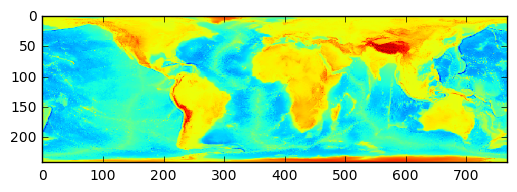

In [2]:
# input file xyz, gdal-edible
# etopo1 = gdal.Open('input/earth.etopo1.tif')
etopo1 = gdal.Open('hypsometry_terrestrial_planets_input/topography/earth.etopo1.cea.asc')



# one should firt get an array out
etopoarray = np.array(etopo1.GetRasterBand(1).ReadAsArray())

# then we show the image
plt.imshow(etopoarray)

len(etopoarray)

## Visualising an histogram of Earth's topography

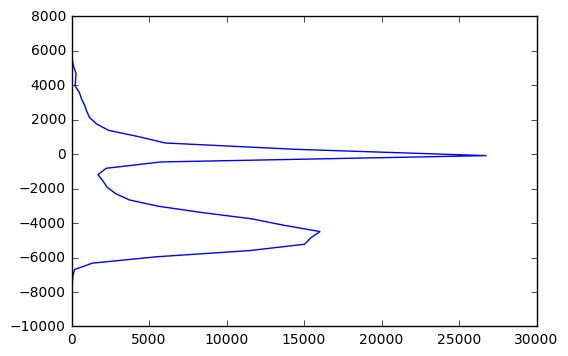

earth maximum is:  6204
earth minimum is:  -10750


In [3]:
# Simple histogram
#import pylab as p
import matplotlib.pyplot as plt

binsearth = np.linspace(-10000., 8000., 50)

histearth, binsearth = np.histogram(etopoarray, binsearth)
plt.plot( histearth, binsearth[:-1] )
plt.show()

print("earth maximum is: ", np.amax(etopoarray))
print("earth minimum is: ", np.nanmin(etopoarray))

## Earth hypsometry

using the same data (at lower resolution) of:

http://www.ngdc.noaa.gov/mgg/global/etopo1_surface_histogram.html



0 185855


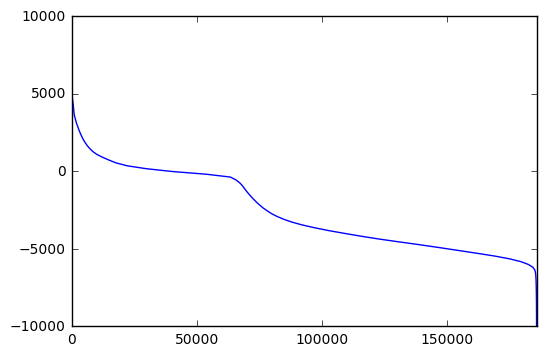

In [4]:
max = 8333 # we lost it due to subsampling
min = -10.803 # we ~lost it due to subsampling

binsearth = np.linspace(-10000., 8000., 100)

histearth, binsearth = np.histogram(etopoarray, binsearth)

maxhypearth= np.nanmax(np.cumsum(histearth))
minhypearth= np.nanmin(np.cumsum(histearth))

plt.plot( (maxhypearth -np.cumsum(histearth)), binsearth[:-1] )

print(minhypearth, maxhypearth)

plt.ylim( (-10000, 10000) )
plt.xlim( minhypearth, maxhypearth )
          

plt.show()

# print("length of bins is", len(binsearth))

# Mars

Loading Mars topography from xyz (derived from MGS MOLA MEGDR)

## Loading and visualising Mars topography (MOLA)

min of mola is:  -7943
max of mola is:  21005


244

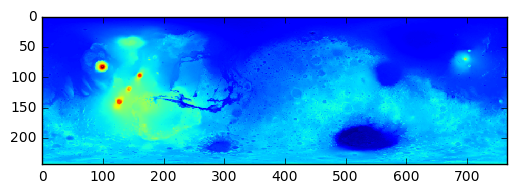

In [5]:
# mola = gdal.Open('input/mars.mola.tif')
mola = gdal.Open('hypsometry_terrestrial_planets_input/topography/mars.mola.cea.asc')


# one should firt get an array out
molaarray = np.array(mola.GetRasterBand(1).ReadAsArray())

# then we show the image
plt.imshow(molaarray)

print("min of mola is: ", np.nanmin(molaarray))
print("max of mola is: ", np.nanmax(molaarray))

minmars = np.nanmin(molaarray)
maxmars = np.nanmax(molaarray)

len(molaarray)

## Histogram of Mars topography

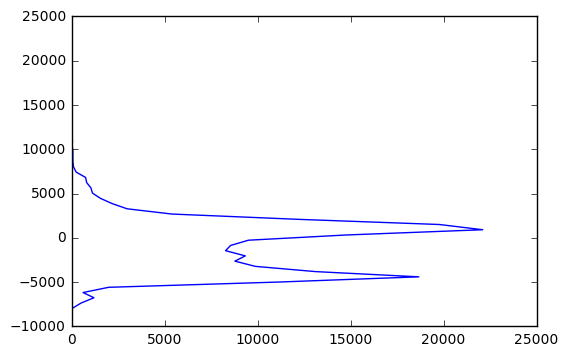

In [6]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

# histogram
binsmars = np.linspace(minmars, maxmars, 50)

histmars, binsmars = np.histogram(molaarray, binsmars)
plt.plot( histmars, binsmars[:-1] )
plt.show()

## Mars hypsography

50 187148


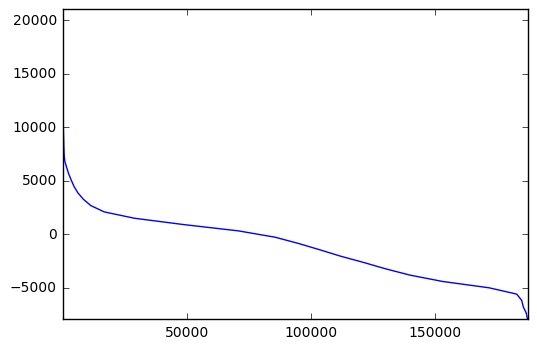

In [7]:

# hypsographic curve

histmars, binsmars = np.histogram(molaarray, binsmars)

maxhypmars= np.nanmax(np.cumsum(histmars))
minhypmars= np.nanmin(np.cumsum(histmars))

plt.plot( (maxhypmars -np.cumsum(histmars)), binsmars[:-1] )


print(minhypmars, maxhypmars)
#percentagecumsum = np.cumsum(hist)/np.sum(hist)*100
#plt.plot( percentagecumsum, bins[:-1] )

plt.ylim( (minmars, maxmars) )
plt.xlim( minhypmars, maxhypmars )

plt.show()





# Moon

## Loading and visualising Moon topography (LOLA)

min of lola is:  -7878.68
max of lola is:  10690.7


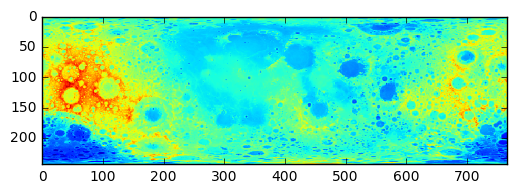

In [8]:
# lola = gdal.Open('input/moon.lola.tif')
lola = gdal.Open('hypsometry_terrestrial_planets_input/topography/moon.lola.cea.asc')



# one should firt get an array out
lolaarray = np.array(lola.GetRasterBand(1).ReadAsArray())

# then we show the image
plt.imshow(lolaarray)

len(lolaarray)

minmoon= np.nanmin(lolaarray)
maxmoon = np.nanmax(lolaarray)

print("min of lola is: ", np.nanmin(lolaarray))
print("max of lola is: ", np.nanmax(lolaarray))

## Moon histogram

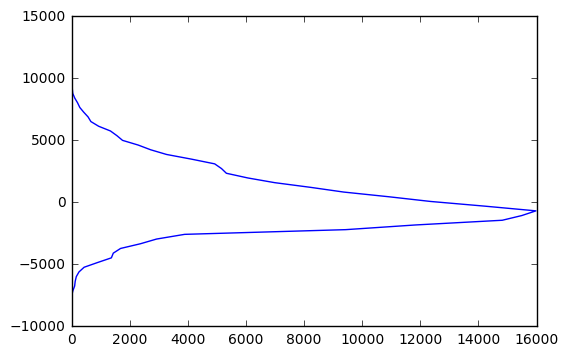

In [9]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

# histogram
binsmoon = np.linspace(minmoon, maxmoon, 50)

histmoon, binsmoon = np.histogram(lolaarray, binsmoon)
plt.plot( histmoon, binsmoon[:-1] )
plt.show()

## Moon hyspgraphy

2 187148


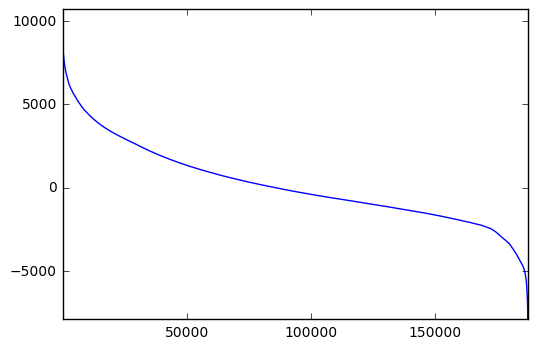

In [10]:
# creating moon hypsography
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

minmoon = np.nanmin(lolaarray)
maxmoon = np.nanmax(lolaarray)
binsmoon = np.linspace(minmoon, maxmoon, 100)
histmoon, binsmoon = np.histogram(lolaarray, binsmoon)

maxhypmoon= np.nanmax(np.cumsum(histmoon))
minhypmoon= np.nanmin(np.cumsum(histmoon))

plt.plot( (maxhypmoon    -np.cumsum(histmoon)), binsmoon[:-1])

# plt.plot( (maxhypmars -np.cumsum(histmars)), binsmars[:-1] )

print(minhypmoon, maxhypmoon)


plt.ylim( (minmoon, maxmoon) )
plt.xlim( minhypmoon, maxhypmoon )

plt.show()



# Venus

## Loading and visualising Venus topography (Magellan)

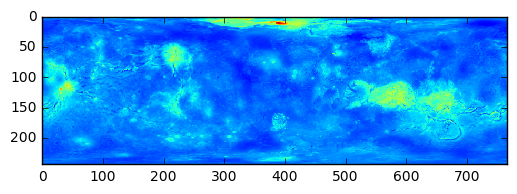

In [11]:
# ALTERNAVITE IMPROVED WITH FILLED GAPS THROUGH:

'''
gdal_translate -a_nodata -32768 venus.magellan.tif venus.magellan.nodata.tif

gdal_fillnodata.py -md 10000 -b 1 -of GTiff venus.magellan.nodata.tif venus.magellan.filled.tif
'''

# magellan = gdal.Open('input/venus.magellan.filled.tif')
magellan = gdal.Open('hypsometry_terrestrial_planets_input/topography/venus.magellan.filled.cea.asc')


# one should firt get an array out
magellanarray = np.array(magellan.GetRasterBand(1).ReadAsArray())


'''
# not needed as nodata have been filled

# remove effect of nodata
magellanarray = magellanarray.astype(float)
magellanarray [magellanarray == -32768 ] = np.NaN

# remove NaN as numpy histogram is bothered..
magellanarray2 = magellanarray[~np.isnan(magellanarray)]
'''


# then we show the image
plt.imshow(magellanarray)

magellanarray2 = magellanarray
# print "len of magellanarray is: ", len(magellanarray)
# print "len of magellanarray2 is: ", len(magellanarray2)



## Venus topography histogram

-2884
11536


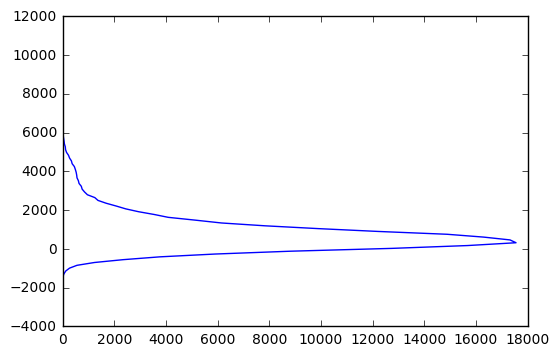

In [12]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

# minimum and maximum
minvenus = np.nanmin(magellanarray2)
print(minvenus)

maxvenus = np.nanmax(magellanarray2)
print(maxvenus)

# histogram
binsvenus = np.linspace(minvenus, maxvenus, 100)

histvenus, binsvenus = np.histogram(magellanarray2, binsvenus)
plt.plot( histvenus, binsvenus[:-1] )
plt.show()

## Venus topography hypsography

187148 2


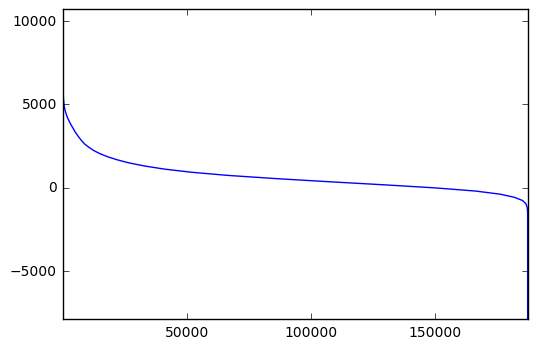

In [13]:
minvenus = np.nanmin(lolaarray)
maxvenus = np.nanmax(lolaarray)
binsvenus = np.linspace(minvenus, maxvenus, 100)
histvenus, binsvenus = np.histogram(magellanarray2, binsvenus)

maxhypvenus= np.nanmax(np.cumsum(histmoon))
minhypvenus= np.nanmin(np.cumsum(histmoon))

plt.plot( (maxhypvenus    -np.cumsum(histvenus)), binsvenus[:-1])


print(maxhypvenus, minhypvenus)


plt.ylim( (minvenus, maxvenus) )
plt.xlim( minhypvenus, maxhypvenus )

plt.show()



# Mercury

## Loading and visualising Mercury topography (MLA)

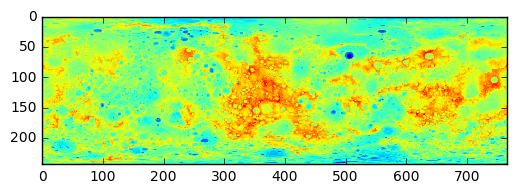

In [14]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

from osgeo import gdal, osr
from gdalconst import *
'''
creation of topography from isis3 .cub

1. import pds
2. change resolution in isis
3. warp to geographic with

gdalwarp -t_srs "+proj=longlat +a=2439700.0 +b=2439700.0 \
  +units=dd" mercury.topo.eqc8ppd.cub mercury.topo.longlat8ppd.tif

4. convert to xyz

gdal_translate -of XYZ mercury.topo.longlat8ppd.tif mercury.topo.longlat8ppd.xyz
'''

# mla = gdal.Open('input/mla-hdem.small.xyz')
mla = gdal.Open('./hypsometry_terrestrial_planets_input/topography/mercury.mla.cea.asc')

mlaarray = np.array(mla.GetRasterBand(1).ReadAsArray())



mlaarray = mlaarray.astype(float)
mlaarray [mlaarray == -32768 ] = np.NaN

# then we show the image
plt.imshow(mlaarray)


## Mercury topography hypsography

-7878.68
10690.7


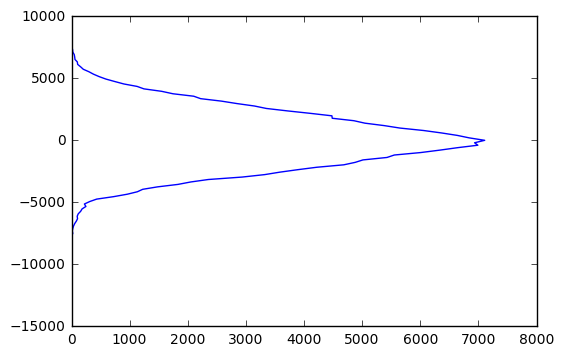

In [15]:
# minimum and maximum
minmercury = np.nanmin(mlaarray)
print(minvenus)

maxmercury = np.nanmax(mlaarray)
print(maxvenus)

# histogram
binsmercury = np.linspace(minmercury, maxmercury, 100)

histmercury, binsmercury = np.histogram(mlaarray, binsmercury)
plt.plot( histmercury, binsmercury[:-1] )
plt.show()

## Histogram of Mercury topography

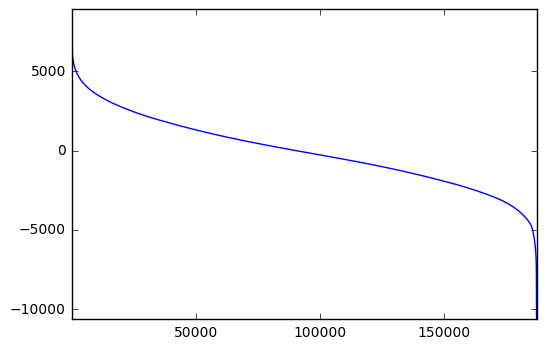

In [16]:
maxhypmercury= np.nanmax(np.cumsum(histmercury))
minhypmercury= np.nanmin(np.cumsum(histmercury))

#plt.plot( (maxhypmoon -np.cumsum(histmoon)), histmoon[:-1] )

plt.plot( (maxhypmercury -np.cumsum(histmercury)), binsmercury[:-1] )


plt.ylim( (minmercury, maxmercury) )
plt.xlim( minhypmercury, maxhypmercury )

plt.show()




# Mars vs Earth

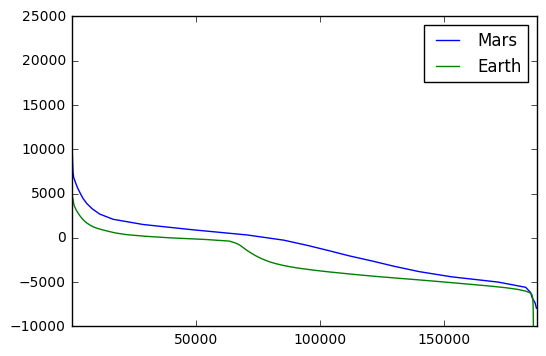

In [17]:
plt.plot( (maxhypmars -np.cumsum(histmars)), binsmars[:-1], label="Mars" )
plt.plot( (maxhypearth -np.cumsum(histearth)), binsearth[:-1], label="Earth"  )
plt.xlim( minhypmars, maxhypmars )

plt.legend(loc='upper right')

plt.show()




# All terrestrial planets

## All histograms

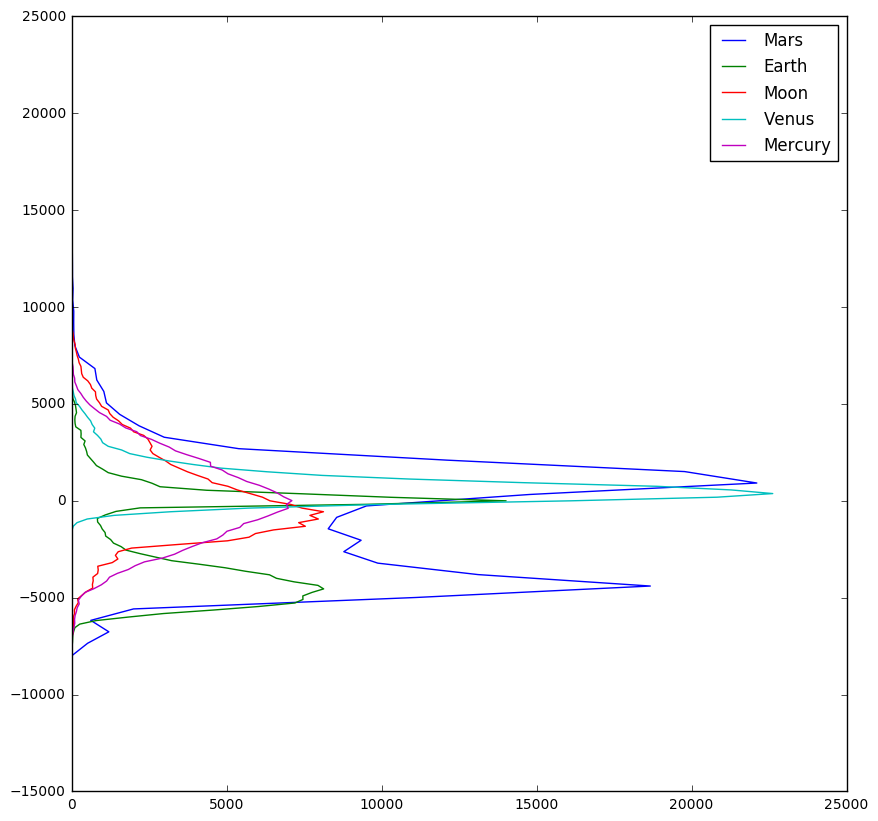

In [18]:
# all together


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

# test with log scale
#ax1.set_yscale('log')

plt.plot( histmars, binsmars[:-1], label="Mars" )
plt.plot( histearth, binsearth[:-1], label="Earth" )
plt.plot( histmoon, binsmoon[:-1], label="Moon" )
plt.plot( histvenus, binsvenus[:-1], label="Venus" )
plt.plot( histmercury, binsmercury[:-1], label="Mercury" )

# plt.xlim( 0, maxhypearth )

plt.legend(loc='upper right')

# plt.savefig('output/terr-planets.topo.histogram.pdf')

plt.show()



## All hypsometries

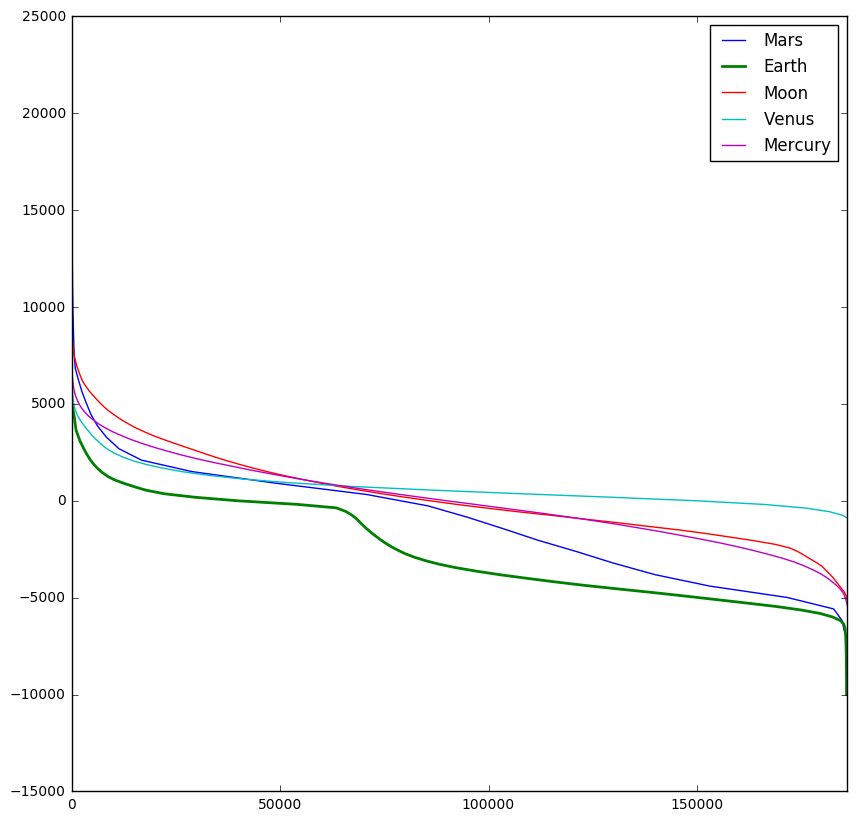

In [19]:
# all together


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

# test with log scale
#ax1.set_yscale('log')

plt.plot( (maxhypmars    -np.cumsum(histmars)), binsmars[:-1], label="Mars" )
plt.plot( (maxhypearth   -np.cumsum(histearth)), binsearth[:-1], label="Earth", linewidth=2.0 )
plt.plot( (maxhypmoon    -np.cumsum(histmoon)), binsmoon[:-1], label="Moon" )
plt.plot( (maxhypvenus   -np.cumsum(histvenus)), binsvenus[:-1], label="Venus" )
plt.plot( (maxhypmercury -np.cumsum(histmercury)), binsmercury[:-1], label="Mercury" )

plt.xlim( 0, maxhypearth )

plt.legend(loc='upper right')

# plt.savefig('output/terr-planets.topo.hypsometry.pdf')

plt.show()

In [20]:
from __future__ import division

# etopo1 = gdal.Open('input/equal-area-topo/earth.etopo1.cea.tif')
# mola = gdal.Open('input/equal-area-topo/mars.mola.cea.tif')
# lola = gdal.Open('input/equal-area-topo/moon.lola.cea.tif')
# magellan = gdal.Open('input/equal-area-topo/venus.magellan.filled.cea.tif')
# mla = gdal.Open('./input/equal-area-topo/mercury.mla.cea.tif')

# number of columns and rows
cols_earth = etopo1.RasterXSize 
rows_earth = etopo1.RasterYSize
print("pixels (x, y) of Earth = ", cols_earth, rows_earth)

cols_mars = etopo1.RasterXSize 
rows_mars = etopo1.RasterYSize
print("pixels (x, y) of Mars = ", cols_mars, rows_mars)

cols_moon = etopo1.RasterXSize 
rows_moon = etopo1.RasterYSize
print("pixels (x, y) of Moon = ", cols_moon, rows_moon)

cols_venus = etopo1.RasterXSize 
rows_venus = etopo1.RasterYSize
print("pixels (x, y) of Venus = ", cols_venus, rows_venus)

cols_mercury = etopo1.RasterXSize 
rows_mercury = etopo1.RasterYSize
print("pixels (x, y) of Mercury = ", cols_mercury, rows_mercury)

# pixel size Earth
earth_geotransform = etopo1.GetGeoTransform()
pixelwidth_earth = earth_geotransform[1]
pixelheigth_earth = earth_geotransform[5]

print("pixel width on Earth is = ", pixelwidth_earth)
print("pixel height on Earth is = ", -pixelheigth_earth)

# pixel size Mars
mars_geotransform = mola.GetGeoTransform()
pixelwidth_mars = mars_geotransform[1]
pixelheigth_mars = mars_geotransform[5]

print("pixel width on Mars is = ", pixelwidth_mars)
print("pixel height on Mars is = ", -pixelheigth_mars)

# pixel size Moon
moon_geotransform = lola.GetGeoTransform()
pixelwidth_moon = moon_geotransform[1]
pixelheigth_moon = moon_geotransform[5]

print("pixel width on Moon is = ", pixelwidth_moon)
print("pixel height on Moon is = ", -pixelheigth_moon)

# pixel size Venus
venus_geotransform = magellan.GetGeoTransform()
pixelwidth_venus = venus_geotransform[1]
pixelheigth_venus = venus_geotransform[5]

print("pixel width on Venus is = ", pixelwidth_venus)
print("pixel height on Venus is = ", -pixelheigth_venus)

# pixel size Mercury
mercury_geotransform = mla.GetGeoTransform()
pixelwidth_mercury= mercury_geotransform[1]
pixelheigth_mercury = mercury_geotransform[5]

print("pixel width on Mercury is = ", pixelwidth_mercury)
print("pixel height on Mercury is = ", -pixelheigth_mercury)




# number of pixels
print("no. pixels for each planet is ", cols_earth*rows_earth)
number_pixels = cols_earth*rows_earth

# total area for each planet

print("total area Earth (m^2) = ", pixelwidth_earth*-pixelheigth_earth*number_pixels)
print("total area Venus (m^2)= ", pixelwidth_venus*-pixelheigth_venus*number_pixels)
print("total area Mars (m^2)= ", pixelwidth_mars*-pixelheigth_mars*number_pixels)
print("total area Mercury (m^2)= ", pixelwidth_mercury*-pixelheigth_mercury*number_pixels)
print("total area Moon (m^2)= ", pixelwidth_moon*-pixelheigth_moon*number_pixels)

print("total area Earth (km^2) = ", pixelwidth_earth*(-pixelheigth_earth)*number_pixels/1000000)
print("total area Venus (km^2)= ", pixelwidth_venus*-pixelheigth_venus*number_pixels/1000000)
print("total area Mars (km^2)= ", pixelwidth_mars*-pixelheigth_mars*number_pixels/1000000)
print("total area Mercury (km^2)= ", pixelwidth_mercury*-pixelheigth_mercury*number_pixels/1000000)
print("total area Moon (km^2)= ", pixelwidth_moon*-pixelheigth_moon*number_pixels/1000000)









pixels (x, y) of Earth =  768 242
pixels (x, y) of Mars =  768 242
pixels (x, y) of Moon =  768 242
pixels (x, y) of Venus =  768 242
pixels (x, y) of Mercury =  768 242
pixel width on Earth is =  52136.49271240214
pixel height on Earth is =  52204.4672791719
pixel width on Mars is =  27818.98886852067
pixel height on Mars is =  27818.98886852067
pixel width on Moon is =  14231.450908273038
pixel height on Moon is =  14231.450908273038
pixel width on Venus is =  49571.71325353216
pixel height on Venus is =  49571.71325353216
pixel width on Mercury is =  19984.154933183883
pixel height on Mercury is =  19984.154933183883
no. pixels for each planet is  185856
total area Earth (m^2) =  505855022853889.9
total area Venus (m^2)=  456714125324913.1
total area Mars (m^2)=  143833241305639.1
total area Mercury (m^2)=  74224650632621.92
total area Moon (m^2)=  37642195337479.44
total area Earth (km^2) =  505855022.8538899
total area Venus (km^2)=  456714125.32491314
total area Mars (km^2)=  143

# References

**TBA**